In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# returns are normal, Random walk
# Geometric brownian motion
# prices are lognormal

In [3]:
start_price = 100
periods = 50000
mean = 0
sd = 0.5

## Price changes are random walks with gaussian movements

In [4]:
%%time
# For loop to generate prices

prices_loop = [start_price]
np.random.seed(10)

for day in range(1, periods + 1):
    prev_price = prices_loop[day - 1]
    price_change = np.random.normal(mean, sd)
    new_price = round(prev_price + price_change, 2)
    prices_loop.append(new_price)
    
print(prices_loop[-5:])

[170.35, 170.85, 170.22, 169.91, 169.83]
CPU times: user 171 ms, sys: 0 ns, total: 171 ms
Wall time: 170 ms


In [5]:
%%time
# Vectorized, about 100x speedup

np.random.seed(10)
price_changes = np.around(np.random.normal(mean, sd, periods), decimals=2)
price_changes = np.insert(price_changes, 0, 0)
prices_vec = start_price + np.cumsum(price_changes)

print(prices_vec[-5:])

[170.35 170.85 170.22 169.91 169.83]
CPU times: user 4.13 ms, sys: 16 µs, total: 4.14 ms
Wall time: 2.76 ms


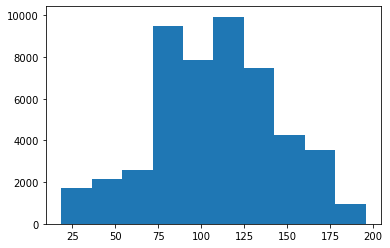

In [6]:
plt.hist(prices_vec);

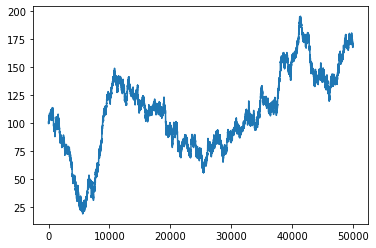

In [7]:
plt.plot(prices_vec);

In [ ]:
del prev_price
del new_price
del price_change
del prices_loop

del price_changes
del prices_vec

## Comparison of price changes vs final price

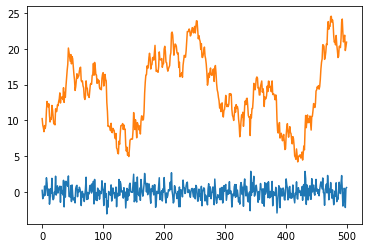

In [8]:
# TODO: Put matching charts into app
# TODO: Make index datetime
np.random.seed(43)
start_price = 10
periods = 500
price_changes = np.random.randn(periods)
price = start_price + price_changes.cumsum()

plt.plot(price_changes)
plt.plot(price);

## Simulation of multiple futures

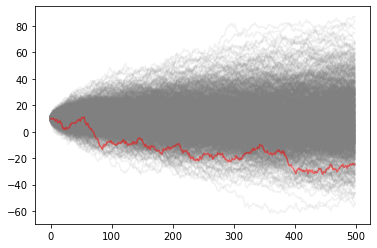

In [9]:
# TODO: Put matching charts into app
np.random.seed(43)
start_price = 10
periods = 500
simulations = 1000
# Date/Time is on rows
# Each col is a simulation
price_changes = np.random.randn(periods, simulations)
price = start_price + price_changes.cumsum(axis=0) #Sum along the rows, i.e. over time

# DONE: Fade out all plots except last plot
# TODO 2: Fade out all previous plots except most recent plot (in app)

# Grey paths show alternative futures
plt.plot(price[:, :simulations - 1], alpha = 0.1, color='grey');
# Red path shows the future we are currently in
plt.plot(price[:, -1], alpha = 0.5, color='red');

## Distribution of end prices

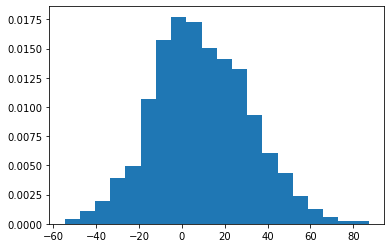

In [10]:
# TODO: Put matching charts into app
final_prices = price[-1, :]
plt.hist(final_prices, bins=20, density=True);